In [1]:
import os
import pickle
import numpy as np
from PIL import Image
from collections import OrderedDict
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
import time

In [2]:
model_list = []

In [3]:
for file in os.listdir("./rotate"):
    if file.startswith("model_name_"):
        print(os.path.join("./rotate", file))
        with open(os.path.join("./rotate", file), "rb") as f:
            model_list_partial = pickle.load(f)
        for model in model_list_partial:
            model_list.append(model.split("/")[-2])
    #break

./rotate\model_name_0
./rotate\model_name_1000
./rotate\model_name_2000
./rotate\model_name_3000
./rotate\model_name_5000
./rotate\model_name_6000
./rotate\model_name_7000
./rotate\model_name_8000
./rotate\model_name_9000


In [4]:
syn_loss = np.zeros(shape=len(model_list))

In [5]:
for i, model in enumerate(model_list):
    #print(model)
    #break
    if i >= 100:
        break
    if i >= 4000:
        idx = i + 1000
    else:
        idx = i
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            synimg = np.array(Image.open(syn_img_path))
            syn_loss[i] += np.mean(np.abs(realimg - synimg))
    syn_loss[i] /= 54
    print(syn_loss[i] / 256 * 3.)
    #break

0.3465758562088012
0.30940616130828846
0.41246094527067967
0.34043871031867134
0.2872722987775449
0.4020698997709486
0.3493734774766147
0.2973076943997983
0.29593832404525194
0.36337356214170113
0.28945749777334717
0.40281669740323656
0.2874121136135526
0.35575232682404695
0.27838818673734317
0.47858135788529016
0.3186986490532204
0.44263984538890705
0.2655599602946529
0.38883061320693413
0.3579021559821235
0.2586603959401448
0.4623315819987544
0.3957920471827189
0.38526614065523523
0.25136843875602444
0.2589695983462863
0.4094583458370633
0.3226687025140833
0.2309415649484705
0.2986695987206919
0.40104105295958337
0.3348603601808902
0.4587179775591247
0.40739268726772726
0.34308900656523533
0.4057835384651466
0.2755574915144179
0.286848545074463
0.30036864457307033
0.41826851721163144
0.2823591541360926
0.2911753036357739
0.25113263836613414
0.4121887154049344
0.3230456599482784
0.34426681200663245
0.3942931802184493
0.4380470955813373
0.25095710489485
0.36361085927044895
0.1999495470

In [ ]:
model_path = "C:\\Users\\AndrewHuang\\Documents\\GitHub\\02958343\\02958343"
refine_loss = np.zeros(shape=len(model_list))
for idx, model in enumerate(model_list):
    #print(model)
    #break
    os.system("blender --background --python 3dloc_2dcoor.py -- --views 18 " + os.path.join(model_path, model, "model.obj"))
    with open("./vertex2pixel", "rb") as f:
        vertex2pixel = pickle.load(f)
    with open("./pixel2vertex", "rb") as f:
        pixel2vertex = pickle.load(f)
    vertex2color = OrderedDict()
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            synimg = np.array(Image.open(syn_img_path))
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        if not repr(pixel2vertex[az, el, i, j, 1:]) in vertex2color:
                            vertex2color[repr(pixel2vertex[az, el, i, j, 1:])] = []
                        vertex2color[repr(pixel2vertex[az, el, i, j, 1:])].append(synimg[i, j])
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            synimg = np.array(Image.open(syn_img_path))
            
            synimg_refined = np.copy(synimg)
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        candidate_pixel = np.mean(vertex2color[repr(pixel2vertex[az, el, i, j, 1:])], axis=0).astype(realimg.dtype)
                        synimg_refined[i, j] = candidate_pixel
            refine_loss[idx] += np.mean(np.abs(realimg - synimg_refined))
            '''
            fig, axs = plt.subplots(1, 3)
            axs[0].imshow(realimg)
            axs[1].imshow(synimg)
            axs[2].imshow(synimg_refined)
            '''
    refine_loss[idx] /= 54
    print("synloss: ", syn_loss[idx], ", refinedloss: ", refine_loss[idx])
    if idx >= 100:
        break
    
print(np.mean(refine_loss) / 256. * 3)

synloss:  29.574473063151036 , refinedloss:  29.71385739173419
synloss:  26.402659098307282 , refinedloss:  26.455729166666668
synloss:  35.196667329764665 , refinedloss:  34.724921709225505
synloss:  29.050769947193288 , refinedloss:  28.565297821421677
synloss:  24.513902829017166 , refinedloss:  24.5161370171441
synloss:  34.30996478045428 , refinedloss:  33.963077874831214
synloss:  29.813203411337785 , refinedloss:  29.765839753327548
synloss:  25.37025658878279 , refinedloss:  26.566662446952165
synloss:  25.2534036518615 , refinedloss:  25.288836820625967
synloss:  31.007877302758494 , refinedloss:  31.213367603443295
synloss:  24.700373143325624 , refinedloss:  24.551214901017552
synloss:  34.373691511742855 , refinedloss:  33.798607720269096
synloss:  24.525833695023156 , refinedloss:  24.45950882523148
synloss:  30.35753188898534 , refinedloss:  30.901268476321373
synloss:  23.75579193491995 , refinedloss:  23.433127320842974
synloss:  40.83894253954476 , refinedloss:  40.615

In [ ]:
def get_dist(a, b):
    aa = (a * np.array([180, 90]) + np.array([180, 0])) * np.pi / 180.
    bb = (b * np.array([180, 90]) + np.array([180, 0])) * np.pi / 180
    posa = np.array([np.cos(aa[1]) * np.sin(aa[0]), np.cos(aa[1]) * np.cos(aa[0]), np.sin(aa[1])])
    posb = np.array([np.cos(bb[1]) * np.sin(bb[0]), np.cos(bb[1]) * np.cos(bb[0]), np.sin(bb[1])])
    return np.linalg.norm(posa - posb)

model_path = "C:\\Users\\AndrewHuang\\Documents\\GitHub\\02958343\\02958343"
refine_dist_loss = np.zeros(shape=len(model_list))
for idx, model in enumerate(model_list):
    #print(model)
    #break
    os.system("blender --background --python 3dloc_2dcoor.py -- --views 18 " + os.path.join(model_path, model, "model.obj"))
    with open("./vertex2pixel", "rb") as f:
        vertex2pixel = pickle.load(f)
    with open("./pixel2vertex", "rb") as f:
        pixel2vertex = pickle.load(f)
    vertex2color = OrderedDict()
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            synimg = np.array(Image.open(syn_img_path))
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        if not repr(pixel2vertex[az, el, i, j, 1:]) in vertex2color:
                            vertex2color[repr(pixel2vertex[az, el, i, j, 1:])] = []
                        vertex2color[repr(pixel2vertex[az, el, i, j, 1:])].append(np.append(synimg[i, j], [az, el]))
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            synimg = np.array(Image.open(syn_img_path))
            
            synimg_refined = np.copy(synimg)
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        candidate_pixel = [0, 0, 0]
                        candidate_weight= 0.0
                        for color_vp in vertex2color[repr(pixel2vertex[az, el, i, j, 1:])]:
                            color = color_vp[:3]
                            dist = get_dist(color_vp[-2:], [az, el])
                            candidate_pixel += color * np.exp(-dist)
                            candidate_weight += np.exp(-dist)
                        synimg_refined[i, j] = candidate_pixel / candidate_weight
            refine_dist_loss[idx] += np.mean(np.abs(realimg - synimg_refined))
            '''
            fig, axs = plt.subplots(1, 3)
            axs[0].imshow(realimg)
            axs[1].imshow(synimg)
            axs[2].imshow(synimg_refined)
            '''
    refine_dist_loss[idx] /= 54
    print("synloss: ", syn_loss[idx], ", refineddistloss: ", refine_dist_loss[idx])
    if idx >= 100:
        break
    
print(np.mean(refine_dist_loss) / 256. * 3)

In [ ]:
root_path = "./"

vsmat = np.zeros(shape=[10, 3, 3, 18, 18])
for model_idx in range(10):
    file = pickle.load(open(root_path + 'vs_mat_' + str(model_idx), 'rb'))
    for log in file:
        #print(log)
        src_file = log[0][0]
        tgt_file = log[1][0]
        src_az = int(src_file.split('_')[-4])
        src_el = int(src_file.split('_')[-2])
        tgt_az = int(tgt_file.split('_')[-4])
        tgt_el = int(tgt_file.split('_')[-2])
        loss = log[2].item()
        #print(src_az, src_el, tgt_az, tgt_el, loss)
        vsmat[model_idx, int(src_el / 10), int(tgt_el / 10), int(src_az / 20), int(tgt_az / 20)] += loss
        
vsmat = np.sum(vsmat, axis=(0, 1, 3))

model_path = "C:\\Users\\AndrewHuang\\Documents\\GitHub\\02958343\\02958343"
refine_info_loss = np.zeros(shape=len(model_list))
for idx, model in enumerate(model_list):
    #print(model)
    #break
    os.system("blender --background --python 3dloc_2dcoor.py -- --views 18 " + os.path.join(model_path, model, "model.obj"))
    with open("./vertex2pixel", "rb") as f:
        vertex2pixel = pickle.load(f)
    with open("./pixel2vertex", "rb") as f:
        pixel2vertex = pickle.load(f)
    vertex2color = OrderedDict()
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            synimg = np.array(Image.open(syn_img_path))
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        if not repr(pixel2vertex[az, el, i, j, 1:]) in vertex2color:
                            vertex2color[repr(pixel2vertex[az, el, i, j, 1:])] = []
                        vertex2color[repr(pixel2vertex[az, el, i, j, 1:])].append(np.append(synimg[i, j], [az, el]))
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            synimg = np.array(Image.open(syn_img_path))
            
            synimg_refined = np.copy(synimg)
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        candidate_pixel = [0, 0, 0]
                        candidate_weight= 0.0
                        for color_vp in vertex2color[repr(pixel2vertex[az, el, i, j, 1:])]:
                            color = color_vp[:3]
                            candidate_pixel += color * np.exp(-vsmat[el, az])
                            candidate_weight += np.exp(-dist)
                        synimg_refined[i, j] = candidate_pixel / candidate_weight
            refine_info_loss[idx] += np.mean(np.abs(realimg - synimg_refined))
            '''
            fig, axs = plt.subplots(1, 3)
            axs[0].imshow(realimg)
            axs[1].imshow(synimg)
            axs[2].imshow(synimg_refined)
            '''
    refine_info_loss[idx] /= 54
    print("synloss: ", syn_loss[idx], ", refineddistloss: ", refine_info_loss[idx])
    if idx >= 100:
        break
    
print(np.mean(refine_info_loss) / 256. * 3)

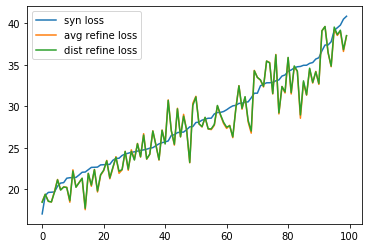

In [23]:
plt.plot(syn_loss[:100][np.argsort(syn_loss[:100])], label="syn loss")
plt.plot(refine_loss[:100][np.argsort(syn_loss[:100])], label="avg refine loss")
plt.plot(refine_dist_loss[:100][np.argsort(syn_loss[:100])], label="dist refine loss")
#plt.plot(refine_info_loss[:100][np.argsort(syn_loss[:100])], label="info refine loss")
plt.legend()

In [24]:
print("syn loss:", np.mean(syn_loss[:100]) / 256. * 3)
print("avg refine loss:", np.mean(refine_loss[:100]) / 256. * 3)
print("dist refine loss:", np.mean(refine_dist_loss[:100]) / 256. * 3)
print("info refine loss", np.mean(refine_info_loss[:100]) / 256. * 3)

syn loss: 0.33170774445203427
avg refine loss: 0.32485504636058093
dist refine loss: 0.3252338505674292
info refine loss 0.38262773580021325


In [25]:
model_path = "C:\\Users\\AndrewHuang\\Documents\\GitHub\\02958343\\02958343"
real_loss = np.zeros(shape=len(model_list))
for idx, model in enumerate(model_list):
    #print(model)
    #break
    os.system("blender --background --python 3dloc_2dcoor.py -- --views 18 " + os.path.join(model_path, model, "model.obj"))
    with open("./vertex2pixel", "rb") as f:
        vertex2pixel = pickle.load(f)
    with open("./pixel2vertex", "rb") as f:
        pixel2vertex = pickle.load(f)
    vertex2color = OrderedDict()
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        if not repr(pixel2vertex[az, el, i, j, 1:]) in vertex2color:
                            vertex2color[repr(pixel2vertex[az, el, i, j, 1:])] = []
                        vertex2color[repr(pixel2vertex[az, el, i, j, 1:])].append(realimg[i, j])
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            
            synimg_refined = np.copy(realimg)
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        candidate_pixel = np.mean(vertex2color[repr(pixel2vertex[az, el, i, j, 1:])], axis=0).astype(realimg.dtype)
                        synimg_refined[i, j] = candidate_pixel
            real_loss[idx] += np.mean(np.abs(realimg - synimg_refined))
            '''
            fig, axs = plt.subplots(1, 3)
            axs[0].imshow(realimg)
            axs[1].imshow(synimg)
            axs[2].imshow(synimg_refined)
            '''
    real_loss[idx] /= 54
    print("synloss: ", syn_loss[idx], ", realloss: ", real_loss[idx])
    if idx >= 100:
        break
    
print(np.mean(real_loss) / 256. * 3)

synloss:  30.122148490246424 , realloss:  10.52450787579572
synloss:  26.891597229757416 , realloss:  11.88402416087963
synloss:  35.84845746550105 , realloss:  14.43890380859375
synloss:  29.58874716843761 , realloss:  9.511814070336614
synloss:  24.96786399251748 , realloss:  11.28177030586902
synloss:  34.94533449861084 , realloss:  12.907594280478396
synloss:  30.365299770807 , realloss:  12.299173237364968
synloss:  25.840076155241736 , realloss:  17.12052107445988
synloss:  25.72105927504412 , realloss:  9.869411515600886
synloss:  31.58209725280958 , realloss:  11.780673180097416
synloss:  24.700373143325624 , realloss:  7.964623722029323
synloss:  34.373691511742855 , realloss:  13.522266529224536
synloss:  24.525833695023156 , realloss:  11.378020486713922
synloss:  30.35753188898534 , realloss:  14.572287100332748
synloss:  23.75579193491995 , realloss:  0.6839980137201003
synloss:  40.83894253954476 , realloss:  13.329624882450808
synloss:  27.195618052541473 , realloss:  9.

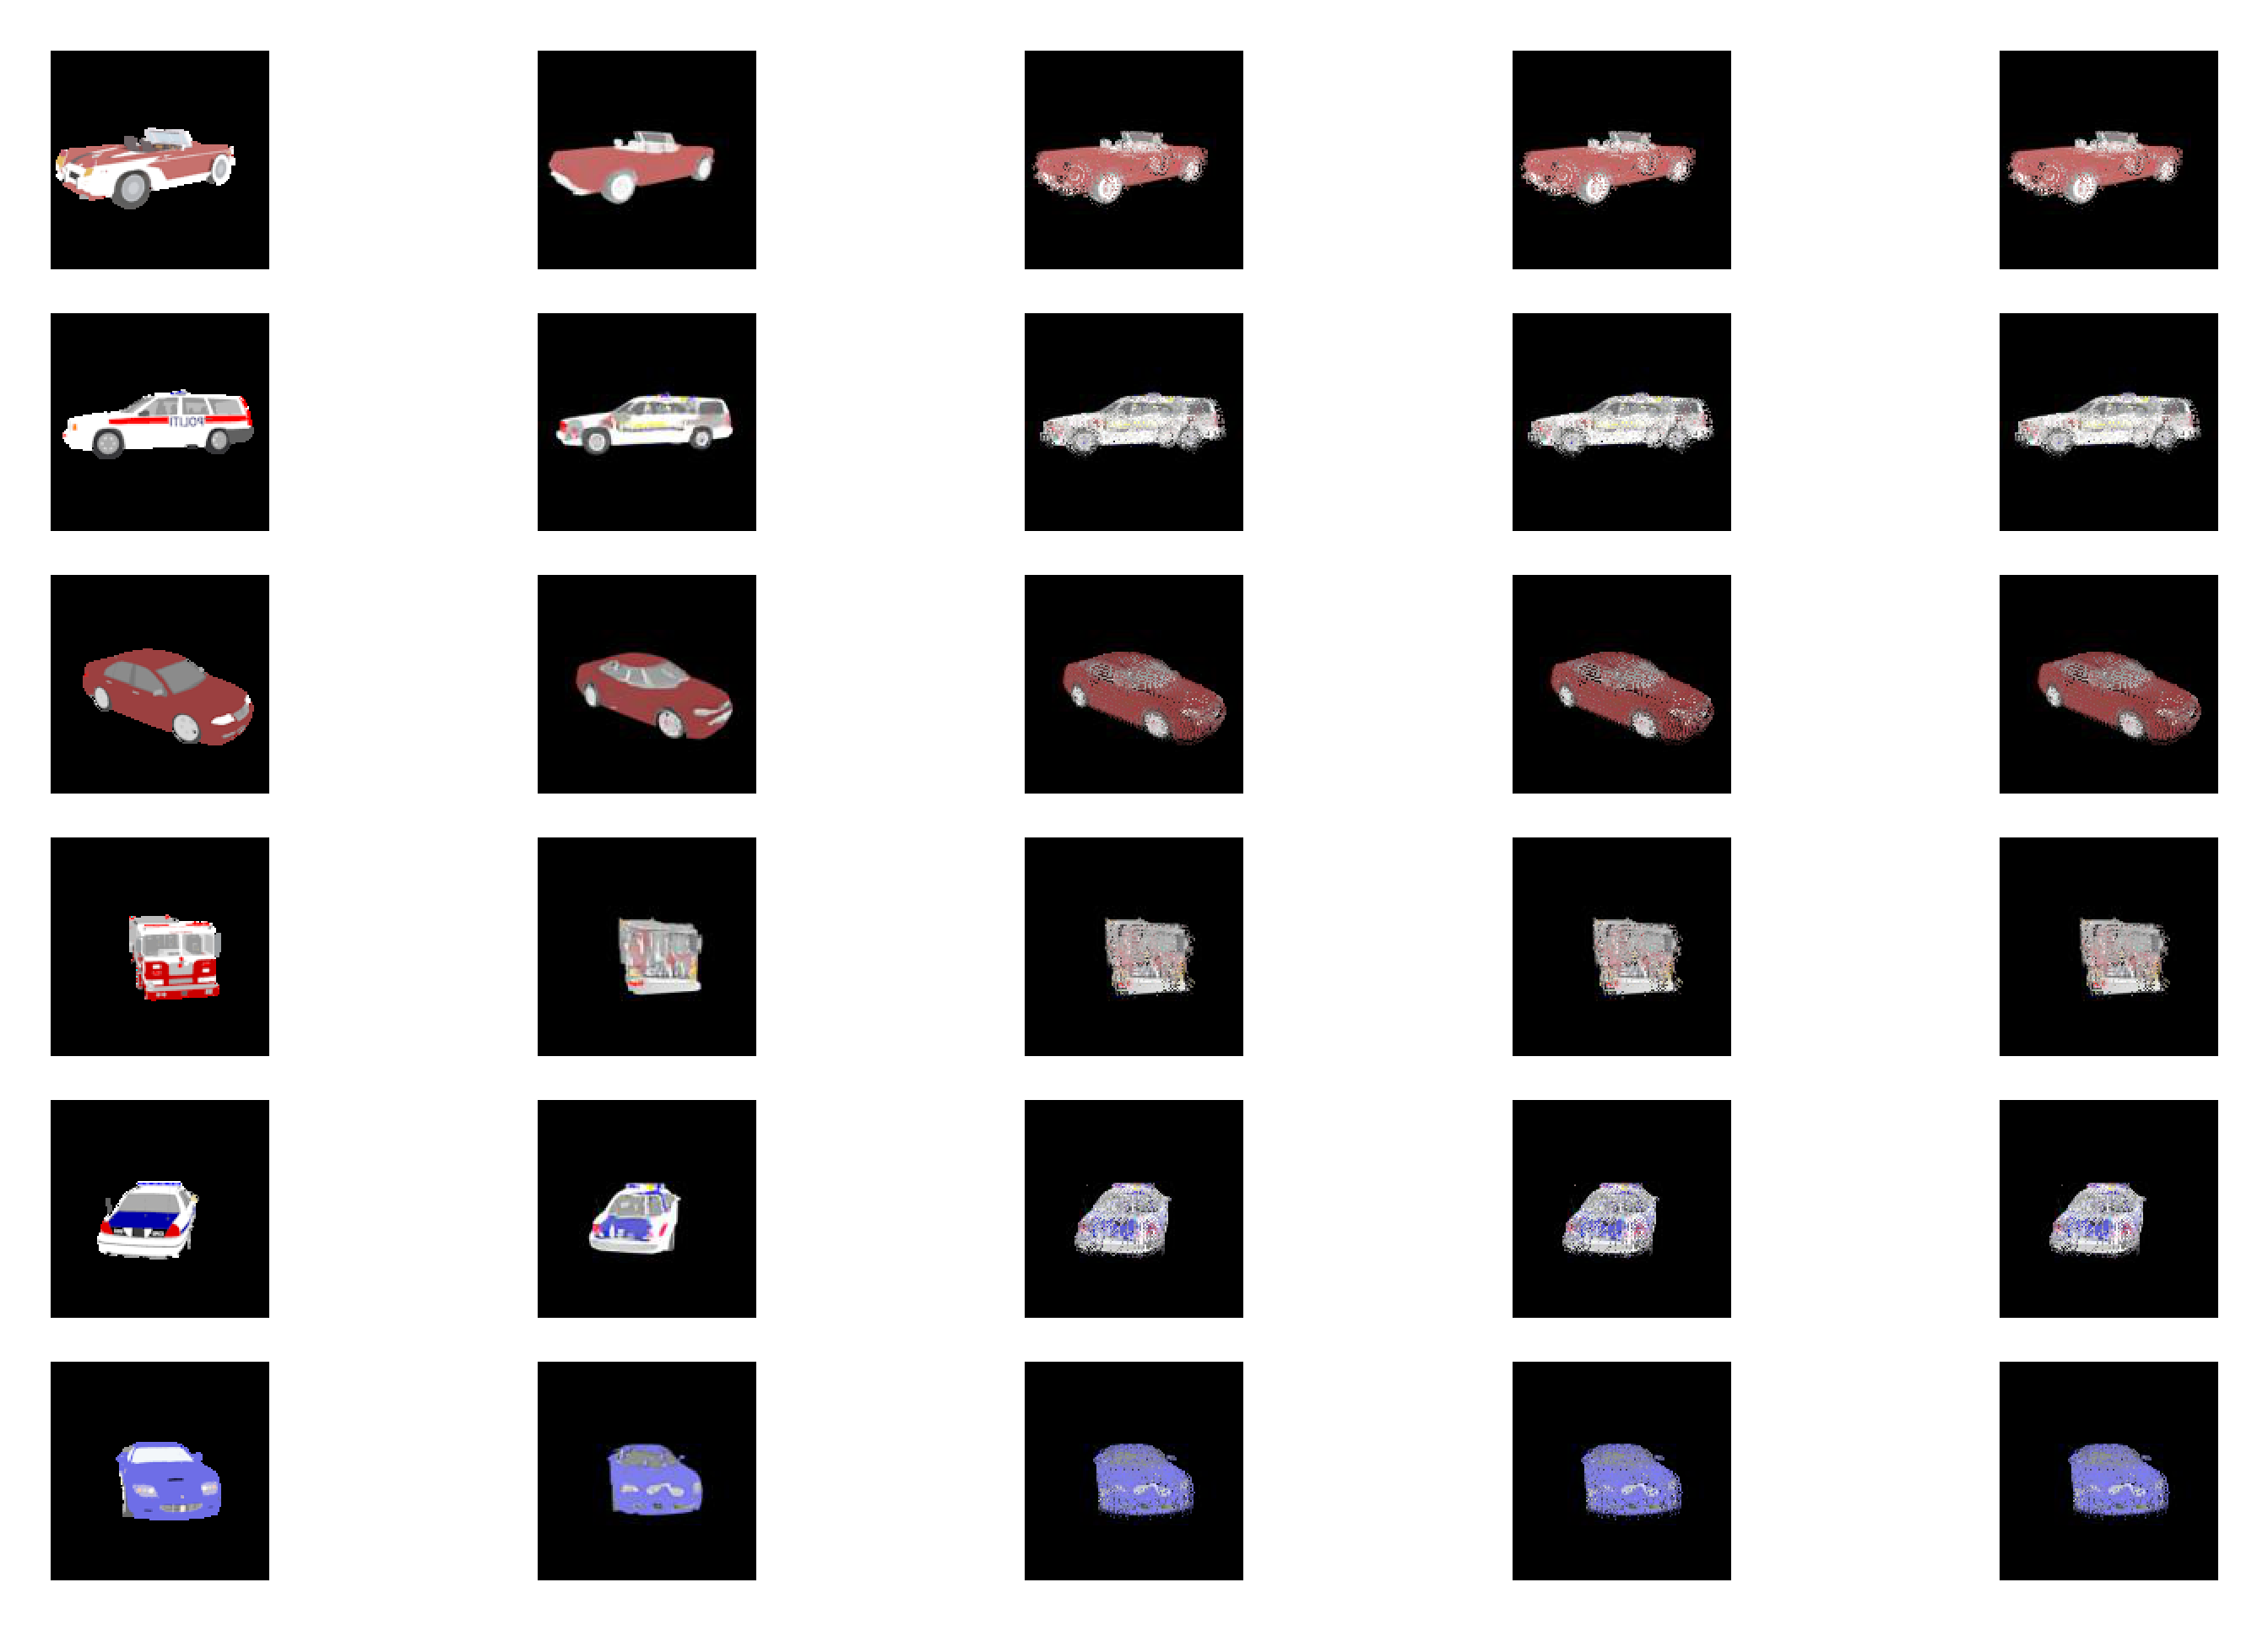

In [13]:
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

def get_dist(a, b):
    aa = (a * np.array([180, 90]) + np.array([180, 0])) * np.pi / 180.
    bb = (b * np.array([180, 90]) + np.array([180, 0])) * np.pi / 180
    posa = np.array([np.cos(aa[1]) * np.sin(aa[0]), np.cos(aa[1]) * np.cos(aa[0]), np.sin(aa[1])])
    posb = np.array([np.cos(bb[1]) * np.sin(bb[0]), np.cos(bb[1]) * np.cos(bb[0]), np.sin(bb[1])])
    return np.linalg.norm(posa - posb)

root_path = "./"

vsmat = np.zeros(shape=[10, 3, 3, 18, 18])
for model_idx in range(10):
    file = pickle.load(open(root_path + 'vs_mat_' + str(model_idx), 'rb'))
    for log in file:
        #print(log)
        src_file = log[0][0]
        tgt_file = log[1][0]
        src_az = int(src_file.split('_')[-4])
        src_el = int(src_file.split('_')[-2])
        tgt_az = int(tgt_file.split('_')[-4])
        tgt_el = int(tgt_file.split('_')[-2])
        loss = log[2].item()
        #print(src_az, src_el, tgt_az, tgt_el, loss)
        vsmat[model_idx, int(src_el / 10), int(tgt_el / 10), int(src_az / 20), int(tgt_az / 20)] += loss
        
vsmat = np.sum(vsmat, axis=(0, 1, 3)) / 54

model_path = "C:\\Users\\AndrewHuang\\Documents\\GitHub\\02958343\\02958343"
fig, axs = plt.subplots(6, 5)# real, syn, avg refine, dist refine, info refine
for i in range(6):
    for j in range(5):
        axs[i, j].axis("off")
                   
for idx, model in enumerate(model_list):
    os.system("blender --background --python 3dloc_2dcoor.py -- --views 18 " + os.path.join(model_path, model, "model.obj"))
    with open("./vertex2pixel", "rb") as f:
        vertex2pixel = pickle.load(f)
    with open("./pixel2vertex", "rb") as f:
        pixel2vertex = pickle.load(f)
    vertex2color = OrderedDict()
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            synimg = np.array(Image.open(syn_img_path))
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        if not repr(pixel2vertex[az, el, i, j, 1:]) in vertex2color:
                            vertex2color[repr(pixel2vertex[az, el, i, j, 1:])] = []
                        vertex2color[repr(pixel2vertex[az, el, i, j, 1:])].append(synimg[i, j])
    if True:
        if True:
            az = np.random.randint(0, 18)
            el = np.random.randint(0, 3)
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            synimg = np.array(Image.open(syn_img_path))
            
            avg_refined = np.copy(synimg)
            dist_refined = np.copy(synimg)
            info_refined = np.copy(synimg)
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        candidate_pixel = np.mean(vertex2color[repr(pixel2vertex[az, el, i, j, 1:])], axis=0).astype(realimg.dtype)
                        avg_refined[i, j] = candidate_pixel
                        candidate_pixel = [0, 0, 0]
                        candidate_weight= 0.0
                        for color_vp in vertex2color[repr(pixel2vertex[az, el, i, j, 1:])]:
                            color = color_vp[:3]
                            dist = get_dist(color_vp[-2:], [az, el])
                            candidate_pixel += color * np.exp(-dist)
                            candidate_weight += np.exp(-dist)
                        dist_refined[i, j] = candidate_pixel / candidate_weight
                        candidate_pixel = [0, 0, 0]
                        candidate_weight= 0.0
                        for color_vp in vertex2color[repr(pixel2vertex[az, el, i, j, 1:])]:
                            color = color_vp[:3]
                            candidate_pixel += color * np.exp(-vsmat[el, az])
                            candidate_weight += np.exp(-vsmat[el, az])
                        info_refined[i, j] = candidate_pixel / candidate_weight

            axs[idx, 0].imshow(realimg)
            axs[idx, 1].imshow(synimg)
            axs[idx, 2].imshow(avg_refined)
            axs[idx, 3].imshow(dist_refined)
            axs[idx, 4].imshow(info_refined)
    if idx >= 5:
        break

In [9]:
vsmat = np.zeros(shape=[10, 3, 3, 18, 18])
for model_idx in range(10):
    file = pickle.load(open(root_path + 'vs_mat_' + str(model_idx), 'rb'))
    for log in file:
        #print(log)
        src_file = log[0][0]
        tgt_file = log[1][0]
        src_az = int(src_file.split('_')[-4])
        src_el = int(src_file.split('_')[-2])
        tgt_az = int(tgt_file.split('_')[-4])
        tgt_el = int(tgt_file.split('_')[-2])
        loss = log[2].item()
        #print(src_az, src_el, tgt_az, tgt_el, loss)
        vsmat[model_idx, int(src_el / 10), int(tgt_el / 10), int(src_az / 20), int(tgt_az / 20)] += loss
        
vsmat = np.sum(vsmat, axis=(0, 1, 3)) / 54

In [10]:
vsmat

array([[2.71648311, 2.69005235, 2.67888461, 2.62610355, 2.51705127,
        2.50512811, 2.6215263 , 2.67689254, 2.693139  , 2.71449821,
        2.69330607, 2.68006911, 2.63352657, 2.5387833 , 2.52641975,
        2.63115996, 2.67290984, 2.68284518],
       [2.72676907, 2.7090314 , 2.69326049, 2.63927377, 2.53884396,
        2.52847509, 2.62875938, 2.68749115, 2.70923995, 2.72401728,
        2.71788936, 2.70830938, 2.66698057, 2.59312688, 2.59000131,
        2.66735696, 2.70126796, 2.70304898],
       [2.73972873, 2.75823269, 2.76763105, 2.71210176, 2.60662286,
        2.59542241, 2.68430912, 2.71923834, 2.73342803, 2.74535754,
        2.76193193, 2.75783964, 2.72346669, 2.65731187, 2.65304314,
        2.71701456, 2.74630276, 2.73690202]])

C:\Users\AndrewHuang\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


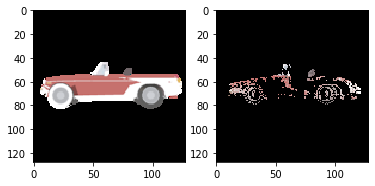

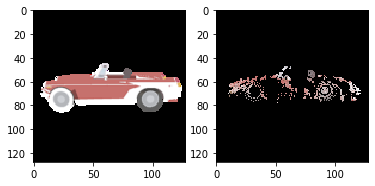

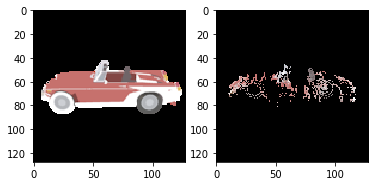

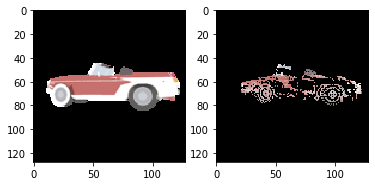

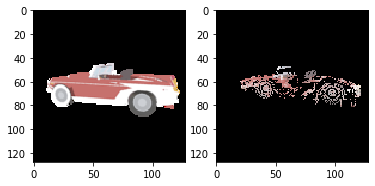

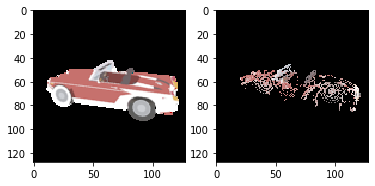

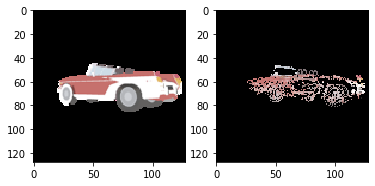

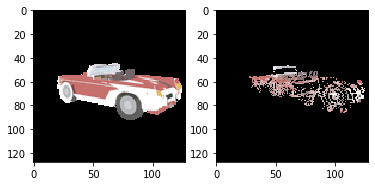

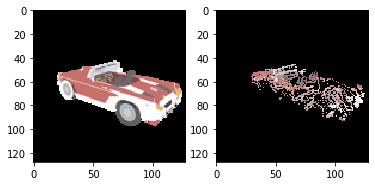

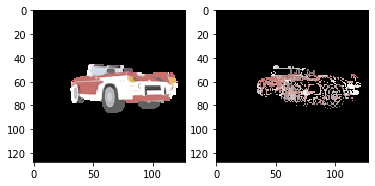

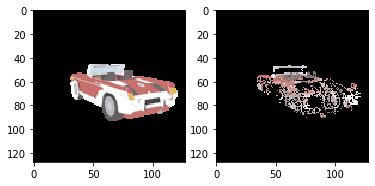

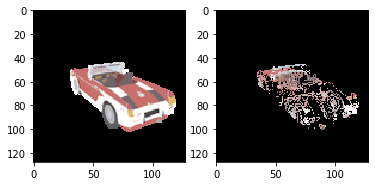

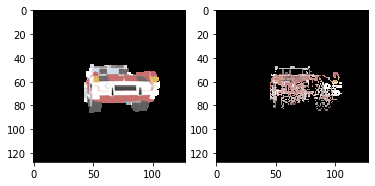

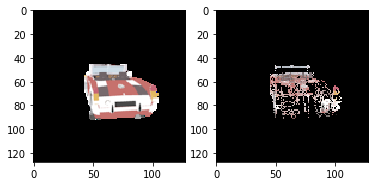

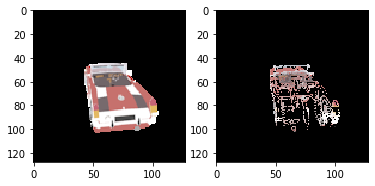

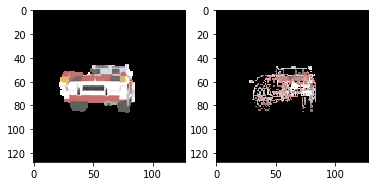

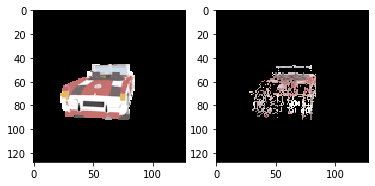

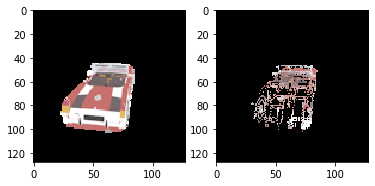

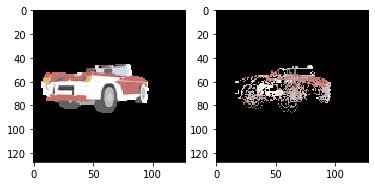

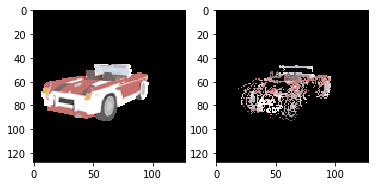

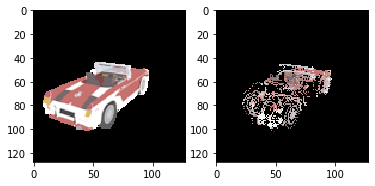

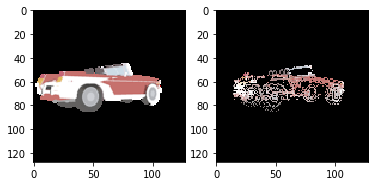

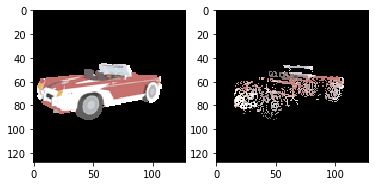

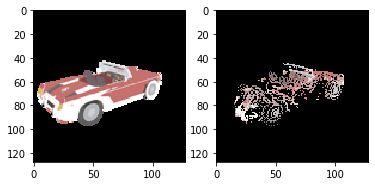

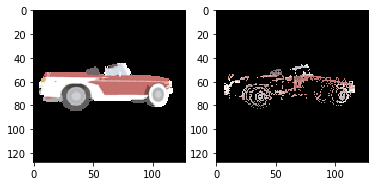

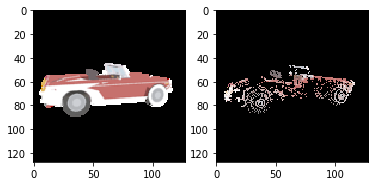

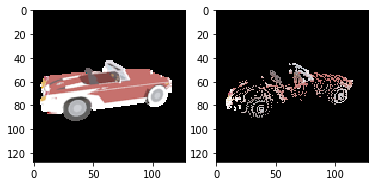

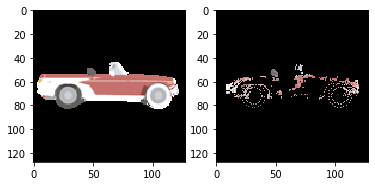

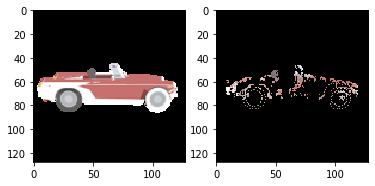

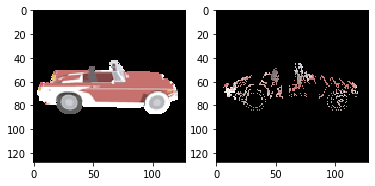

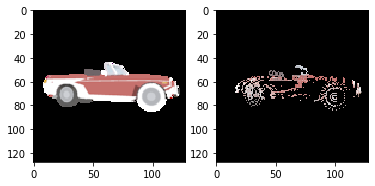

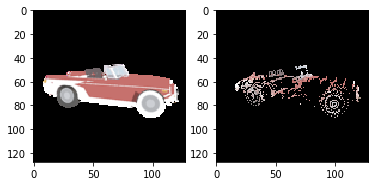

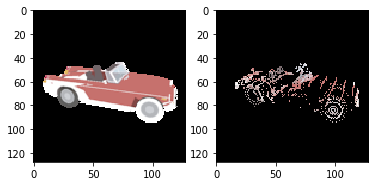

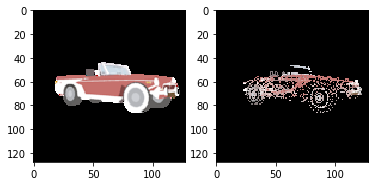

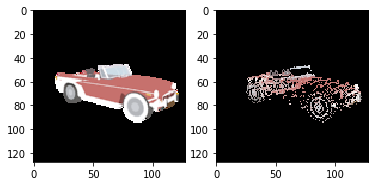

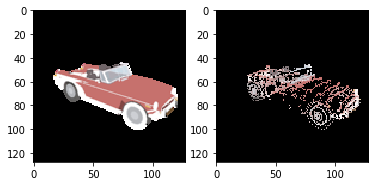

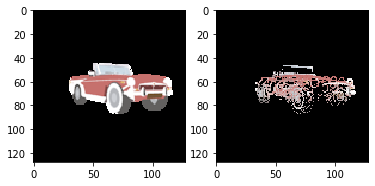

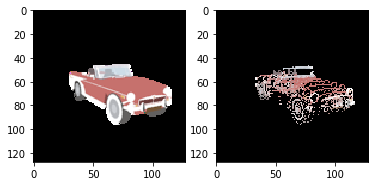

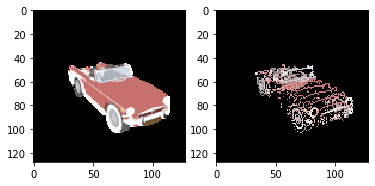

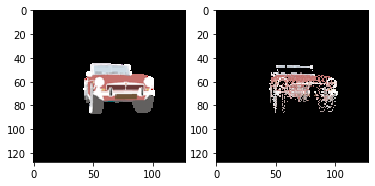

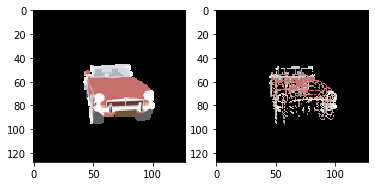

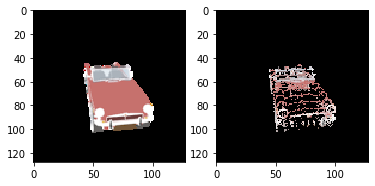

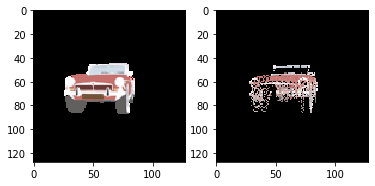

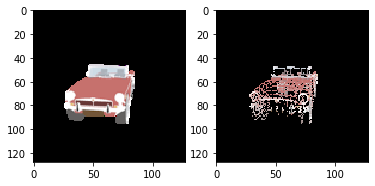

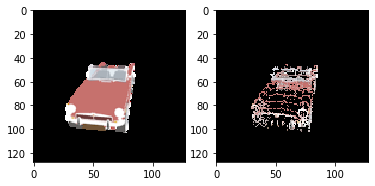

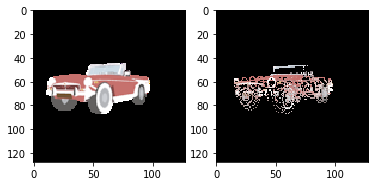

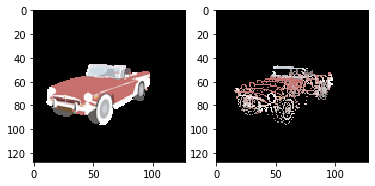

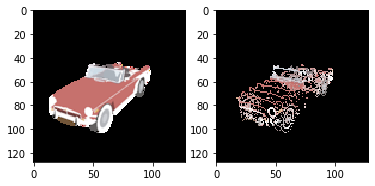

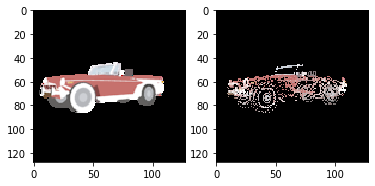

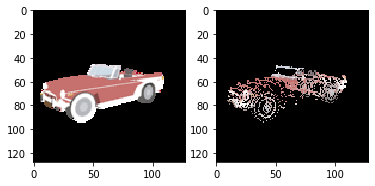

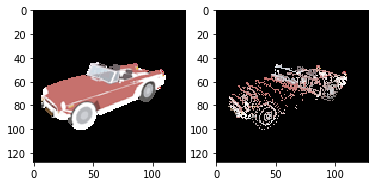

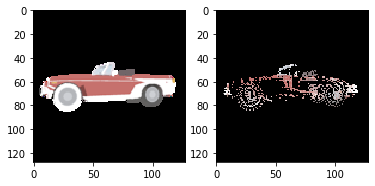

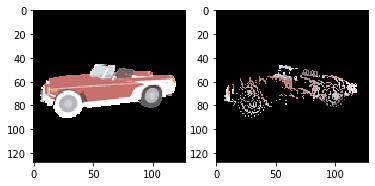

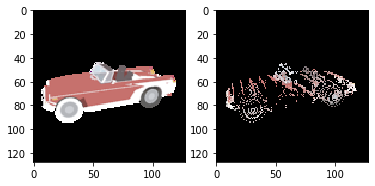

In [22]:
model_path = "C:\\Users\\AndrewHuang\\Documents\\GitHub\\02958343\\02958343"
for idx, model in enumerate(model_list):
    #print(model)
    #break
    os.system("blender --background --python 3dloc_2dcoor.py -- --views 18 " + os.path.join(model_path, model, "model.obj"))
    with open("./vertex2pixel", "rb") as f:
        vertex2pixel = pickle.load(f)
    with open("./pixel2vertex", "rb") as f:
        pixel2vertex = pickle.load(f)
    vertex2color = OrderedDict()
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            synimg = np.array(Image.open(syn_img_path))
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        if not repr(pixel2vertex[az, el, i, j, 1:]) in vertex2color:
                            vertex2color[repr(pixel2vertex[az, el, i, j, 1:])] = []
                        vertex2color[repr(pixel2vertex[az, el, i, j, 1:])].append(realimg[i, j])
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            
            synimg_refined = np.copy(realimg)
            synimg_refined.fill(0)
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        candidate_pixel = np.mean(vertex2color[repr(pixel2vertex[az, el, i, j, 1:])], axis=0)
                        synimg_refined[i, j] = candidate_pixel
            fig, axs = plt.subplots(1, 2)
            axs[0].imshow(realimg)
            axs[1].imshow(synimg_refined)
    if idx >= 0:
        break

In [15]:
def get_dist(a, b):
    aa = (a * np.array([180, 90]) + np.array([180, 0])) * np.pi / 180.
    bb = (b * np.array([180, 90]) + np.array([180, 0])) * np.pi / 180
    posa = np.array([np.cos(aa[1]) * np.sin(aa[0]), np.cos(aa[1]) * np.cos(aa[0]), np.sin(aa[1])])
    posb = np.array([np.cos(bb[1]) * np.sin(bb[0]), np.cos(bb[1]) * np.cos(bb[0]), np.sin(bb[1])])
    return np.linalg.norm(posa - posb)

root_path = "./"

vsmat = np.zeros(shape=[10, 3, 3, 18, 18])
for model_idx in range(10):
    file = pickle.load(open(root_path + 'vs_mat_' + str(model_idx), 'rb'))
    for log in file:
        #print(log)
        src_file = log[0][0]
        tgt_file = log[1][0]
        src_az = int(src_file.split('_')[-4])
        src_el = int(src_file.split('_')[-2])
        tgt_az = int(tgt_file.split('_')[-4])
        tgt_el = int(tgt_file.split('_')[-2])
        loss = log[2].item()
        #print(src_az, src_el, tgt_az, tgt_el, loss)
        vsmat[model_idx, int(src_el / 10), int(tgt_el / 10), int(src_az / 20), int(tgt_az / 20)] += loss
        
vsmat = np.sum(vsmat, axis=(0, 1, 3)) / 54

model_path = "C:\\Users\\AndrewHuang\\Documents\\GitHub\\02958343\\02958343"

refine_loss = np.zeros(shape=len(model_list))
refine_dist_loss = np.zeros(shape=len(model_list))
refine_info_loss = np.zeros(shape=len(model_list))
                   
for idx, model in enumerate(model_list):
    os.system("blender --background --python 3dloc_2dcoor.py -- --views 18 " + os.path.join(model_path, model, "model.obj"))
    with open("./vertex2pixel", "rb") as f:
        vertex2pixel = pickle.load(f)
    with open("./pixel2vertex", "rb") as f:
        pixel2vertex = pickle.load(f)
    vertex2color = OrderedDict()
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            synimg = np.array(Image.open(syn_img_path))
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        if not repr(pixel2vertex[az, el, i, j, 1:]) in vertex2color:
                            vertex2color[repr(pixel2vertex[az, el, i, j, 1:])] = []
                        vertex2color[repr(pixel2vertex[az, el, i, j, 1:])].append(synimg[i, j])
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            synimg = np.array(Image.open(syn_img_path))
            
            avg_refined = np.copy(synimg)
            dist_refined = np.copy(synimg)
            info_refined = np.copy(synimg)
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        candidate_pixel = np.mean(vertex2color[repr(pixel2vertex[az, el, i, j, 1:])], axis=0).astype(realimg.dtype)
                        avg_refined[i, j] = candidate_pixel
                        candidate_pixel = [0, 0, 0]
                        candidate_weight= 0.0
                        for color_vp in vertex2color[repr(pixel2vertex[az, el, i, j, 1:])]:
                            color = color_vp[:3]
                            dist = get_dist(color_vp[-2:], [az, el])
                            candidate_pixel += color * np.exp(-dist)
                            candidate_weight += np.exp(-dist)
                        dist_refined[i, j] = candidate_pixel / candidate_weight
                        candidate_pixel = [0, 0, 0]
                        candidate_weight= 0.0
                        for color_vp in vertex2color[repr(pixel2vertex[az, el, i, j, 1:])]:
                            color = color_vp[:3]
                            candidate_pixel += color * np.exp(-vsmat[el, az])
                            candidate_weight += np.exp(-vsmat[el, az])
                        info_refined[i, j] = candidate_pixel / candidate_weight
            refine_loss[idx] += np.mean(np.abs(realimg - avg_refined))
            refine_dist_loss[idx] += np.mean(np.abs(realimg - dist_refined))
            refine_info_loss[idx] += np.mean(np.abs(realimg - info_refined))
    refine_loss[idx] /= 54
    refine_dist_loss[idx] /= 54
    refine_info_loss[idx] /= 54
    print(syn_loss[idx], refine_loss[idx], refine_dist_loss[idx], refine_info_loss[idx])
    
    if idx >= 100:
        break

29.574473063151036 29.916880666473777 29.913706084828323 29.912279670621146
26.402659098307282 26.35373414592979 26.420634328583137 26.353503568672846
35.196667329764665 33.366102807315784 33.46816263081115 33.36000418957369
29.050769947193288 27.503652313609177 27.674097885320222 27.50273414894387
24.513902829017166 24.302192217038005 24.354620285976072 24.30189947434414
34.30996478045428 32.04822493188175 32.14006287374613 32.045372480227634
29.813203411337785 29.726927203896597 29.834444399233217 29.722626109182105
25.37025658878279 29.671083803530088 29.61606400101273 29.663946081090852
25.2534036518615 25.589973355516985 25.698821644724152 25.589301215277786
31.007877302758494 32.865370385440784 32.87933349609376 32.863661777826
24.700373143325624 24.137378833912038 24.22962405357831 24.13651869032119
34.373691511742855 32.02529907226563 32.237399631076386 32.005256181881755
24.525833695023156 24.02792358398437 24.050946270978006 24.01842847282504
30.35753188898534 32.194308810763

In [16]:
import pickle

with open("./syn_refine_loss_" + str(100), "wb") as f:
    pickle.dump([syn_loss[:100], refine_loss[:100], refine_dist_loss[:100], refine_info_loss[:100]], f)